In [1]:
%load_ext autoreload
%autoreload 2

In [58]:
from SubjectiveLogic import Hyperopinion, HyperopinionInterface
from SubjectiveLogic import Hyperopinion as W
from SubjectiveLogic.BeliefFusion import cumulative_fusion, averaging_fusion, weighted_fusion
from SubjectiveLogic.Trust import trust_discount_2e
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable

# Belief fusion operators

In [3]:
AX = Hyperopinion(2, [0.29, 0.71])
BX = Hyperopinion(2, [0.73, 0.27])

## Cumulative belief fusion

In [4]:
cumulative_fusion([AX, BX])

Hyperopinion(2, [0.51 0.49], [0.5 0.5])

In [253]:
cumulative_fusion([W(2, [0.5, 0.4]), W(2, [0.5, 0.4])])

Hyperopinion(2, [0.52631579 0.42105263], [0.5 0.5])

- It is not idempotent: Equal non-dogmatic opinions will increase confidence.
- If there is a dogmatic opinion, the opinion will be an "average" between the dogmatic opinions.

## Averaging belief fusion

In [5]:
averaging_fusion([AX, BX])

Hyperopinion(2, [0.51 0.49], [0.5 0.5])

- It's idempotent: Equal non-dogmatic opinions have the same confidence.
- But it doesn't have a neutral element: Fusing a completely uncertain opinion with a non-dogmatic opinion will decrease confidence.
- If there is a dogmatic opinion, the opinion will be an "average" between the dogmatic opinions.

## Weighted belief fusion

In [6]:
weighted_fusion([AX, BX])

Hyperopinion(2, [0.51 0.49], [0.5 0.5])

- It's idempotent: Equal non-dogmatic opinions have the same confidence.
- It has a neutral element: Fusing a completely uncertain opinion with a non-dogmatic opinion will have the same belief mass as the non-dogmatic opinion.
- If there is a dogmatic opinion, the opinion will be an "average" between the dogmatic opinions.

# Definitions

In [7]:
State = List['HyperopinionInterface']
TrustGraph = List[List['HyperopinionInterface']]
TrustArray = List['HyperopinionInterface']

# Initial opinions

## Unifom state with a dogmatic opinion

In [257]:
def uniform_with_dogmatic(n: int) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / (n - 1), 0]))
#     ans.append(Hyperopinion(2, [0.9, 0.1]))
    return(ans)

In [258]:
uniform_with_dogmatic(10)

[Hyperopinion(2, [0. 0.], [0.5 0.5]),
 Hyperopinion(2, [0.11111111 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.22222222 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.33333333 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.44444444 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.55555556 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.66666667 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.77777778 0.        ], [0.5 0.5]),
 Hyperopinion(2, [0.88888889 0.        ], [0.5 0.5]),
 Hyperopinion(2, [1. 0.], [0.5 0.5])]

## Uniform state without a dogmatic opinion

In [10]:
def uniform_without_dogmatic(n : int) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / n, 0]))
    return(ans)

In [11]:
uniform_without_dogmatic(10)

[Hyperopinion(2, [0. 0.], [0.5 0.5]),
 Hyperopinion(2, [0.1 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.2 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.3 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.4 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.5 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.6 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.7 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.8 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.9 0. ], [0.5 0.5])]

## Uniform with fixed uncertainty

In [226]:
def uniform_u_fixed(n : int, u: float) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / n, 1 - u - i / n]))
    return(ans)

In [227]:
uniform_u_fixed(4, 0.1)

[Hyperopinion(2, [0.  0.9], [0.5 0.5]),
 Hyperopinion(2, [0.25 0.65], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.75 0.15], [0.5 0.5])]

## Uniform state only with dogmatic opinions

In [12]:
def uniform_dogmatic(n: int) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, [i / (n - 1), 1 - i / (n - 1)]))
    return(ans)

In [13]:
uniform_dogmatic(10)

[Hyperopinion(2, [0. 1.], [0.5 0.5]),
 Hyperopinion(2, [0.11111111 0.88888889], [0.5 0.5]),
 Hyperopinion(2, [0.22222222 0.77777778], [0.5 0.5]),
 Hyperopinion(2, [0.33333333 0.66666667], [0.5 0.5]),
 Hyperopinion(2, [0.44444444 0.55555556], [0.5 0.5]),
 Hyperopinion(2, [0.55555556 0.44444444], [0.5 0.5]),
 Hyperopinion(2, [0.66666667 0.33333333], [0.5 0.5]),
 Hyperopinion(2, [0.77777778 0.22222222], [0.5 0.5]),
 Hyperopinion(2, [0.88888889 0.11111111], [0.5 0.5]),
 Hyperopinion(2, [1. 0.], [0.5 0.5])]

## Consensus state

In [195]:
def consensus_state(n: int, b) -> State:
    ans = []
    for i in range(n):
        ans.append(Hyperopinion(2, b))
    return(ans)

In [196]:
consensus_state(3, [0.5, 0.4])

[Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5])]

# Trust graph

All trust opinions are dogmatic. (Explain)

## Clique

In [14]:
def clique(n: int, belief: float) -> TrustGraph:
    trust_graph = []
    for i in range(n):
        trust_graph.append([Hyperopinion(2, [belief, 1 - belief]) if i != j else None for j in range(n)])
    return trust_graph

In [15]:
trust_graph = clique(3, 0.5)
{i : trust_graph[i] for i in range(len(trust_graph))}

{0: [None,
  Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  Hyperopinion(2, [0.5 0.5], [0.5 0.5])],
 1: [Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  None,
  Hyperopinion(2, [0.5 0.5], [0.5 0.5])],
 2: [Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  Hyperopinion(2, [0.5 0.5], [0.5 0.5]),
  None]}

# Update opinion

In [165]:
def update(
        fusion_operator: Callable[[int], State],
        truster_index: int,
        trust_array: TrustArray,
        state: State) -> HyperopinionInterface:
    truster_opinion = state[truster_index]
    discount_array = [trust_discount_2e(trust_array[trustee_index], state[trustee_index])
        for trustee_index in range(len(state)) if truster_index != trustee_index]
#     print("discount_array =", discount_array)
#     print([truster_opinion] + discount_array)
    new_opinion = fusion_operator([truster_opinion] + discount_array)
    return new_opinion

In [166]:
state = [A, B, C]
state

[Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5])]

In [167]:
trust_graph = clique(3, 1)
trust_graph[0]

[None, Hyperopinion(2, [1 0], [0.5 0.5]), Hyperopinion(2, [1 0], [0.5 0.5])]

In [168]:
update(cumulative_fusion, 0, trust_graph[0], state)

Hyperopinion(2, [0.53571429 0.42857143], [0.5 0.5])

# Update state

In [169]:
def overall_update(
        fusion_operator: Callable[[int], State],
        trust_graph: TrustGraph,
        state: State) -> HyperopinionInterface:
    new_state = []
    N = len(state)
    for i in range(N):
        new_state.append(update(fusion_operator, i, trust_graph[i], state))
    return new_state

# Simulations

In [170]:
def plot(n, interactions, states):
    fig, [axb, axd, axu] = plt.subplots(1, 3)
    fig.set(figwidth=16)
    axb.set_title("Belief")
    axd.set_title("Disbelief")
    axu.set_title("Uncertainty")
    for i in range(n):
        axb.plot(list(range(interactions)), [states[j][i].b[0] for j in range(interactions)])
        axd.plot(list(range(interactions)), [states[j][i].b[1] for j in range(interactions)])
        axu.plot(list(range(interactions)), [states[j][i].u for j in range(interactions)])

## Clique

### Uniform with only dogmatic opinions

#### Cumulative fusion

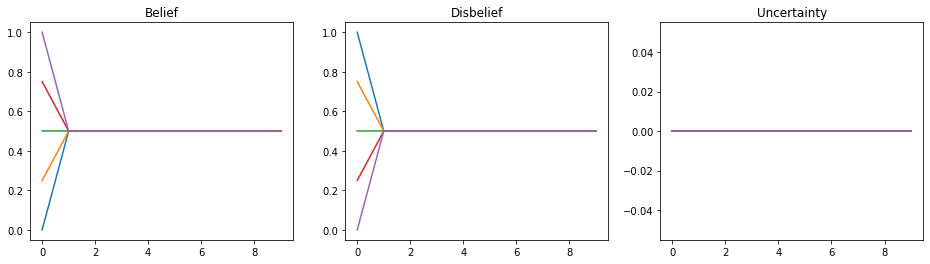

In [254]:
N = 5
INTERACTIONS = 10
state = uniform_dogmatic(N)
states = [state]
trust_graph = clique(N, 1)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

#### Averaging fusion

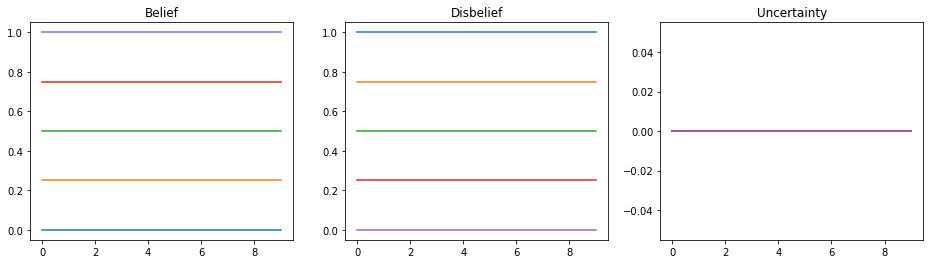

In [172]:
N = 5
INTERACTIONS = 10
state = uniform_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.5)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

### Uniform with a dogmatic opinion

#### Cumulative fusion

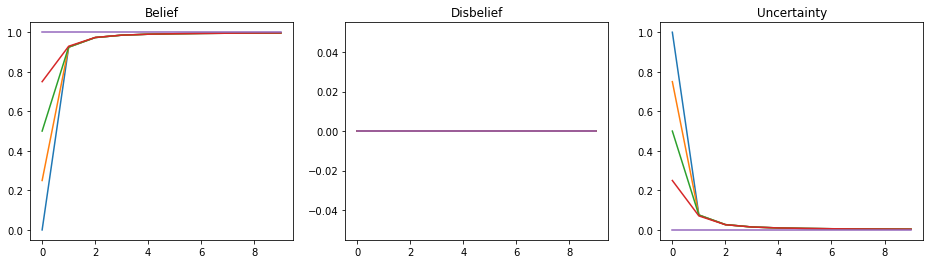

In [279]:
N = 5
INTERACTIONS = 10
state = uniform_with_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.9)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

#### Averaging fusion

In [256]:
states[0]

[Hyperopinion(2, [0. 0.], [0.5 0.5]),
 Hyperopinion(2, [0.25 0.  ], [0.5 0.5]),
 Hyperopinion(2, [0.5 0. ], [0.5 0.5]),
 Hyperopinion(2, [0.75 0.  ], [0.5 0.5]),
 Hyperopinion(2, [0.9 0.1], [0.5 0.5])]

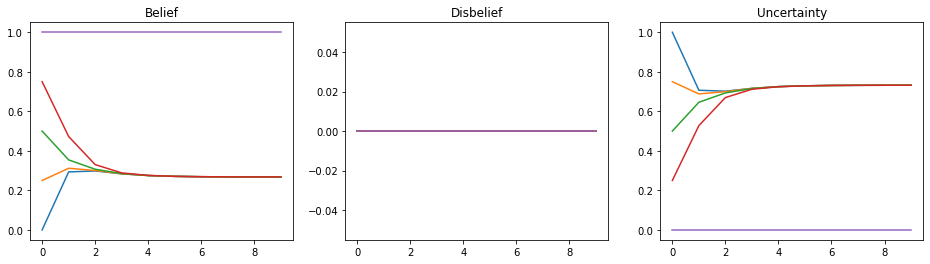

In [280]:
N = 5
INTERACTIONS = 10
state = uniform_with_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.5)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

### Uniform without dogmatic opinion

#### Cumulative fusion

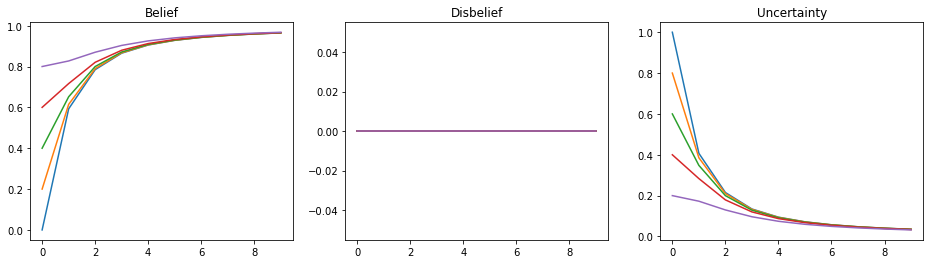

In [177]:
N = 5
INTERACTIONS = 10
state = uniform_without_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.5)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

#### Averaging fusion

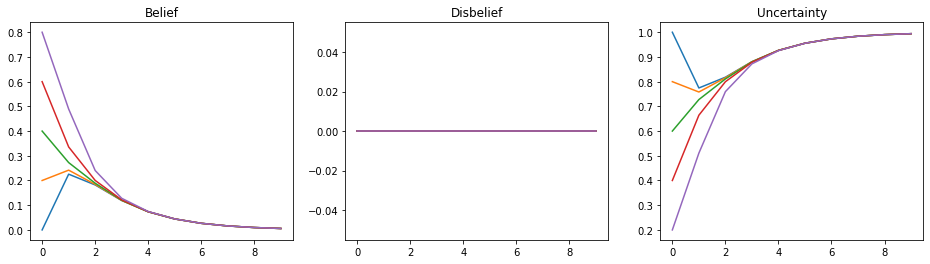

In [178]:
N = 5
INTERACTIONS = 10
state = uniform_without_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.5)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

# Tests Sep 29

In [35]:
AX = Hyperopinion(2, [0.3, 0.3])

In [36]:
BX = Hyperopinion(2, [0.2, 0.4])

In [37]:
CX = Hyperopinion(2, [0.3, 0.4])

In [38]:
AB = Hyperopinion(2, [0.25, 0.75])

In [39]:
AC = Hyperopinion(2, [0.75, 0.25])

In [40]:
ABX = trust_discount_2e(AB, BX)
ABX

Hyperopinion(2, [0.05 0.1 ], [0.5 0.5])

In [41]:
ACX = trust_discount_2e(AB, CX)
ACX

Hyperopinion(2, [0.075 0.1  ], [0.5 0.5])

In [42]:
NAX = averaging_fusion([AX, ABX, ACX])
NAX

Hyperopinion(2, [0.1840474  0.20227894], [0.5 0.5])

In [43]:
NAX.u

0.6136736554238833

# Tests Oct 6

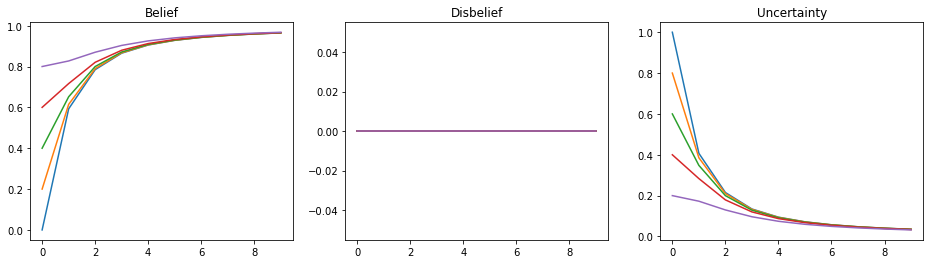

In [180]:
N = 5
INTERACTIONS = 10
state = uniform_without_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.5)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

In [51]:
print(cumulative_fusion([Hyperopinion(2, [0.8, 0]), Hyperopinion(2, [0.1, 0]), Hyperopinion(2, [0.1, 0])]))

k = 2
            
b({0}) = 0.8085106382978725
b({1}) = 0.0
u = 0.1914893617021275

a({0}) = 0.5
a({1}) = 0.5

P({0}) = 0.9042553191489362
P({1}) = 0.09574468085106375


# Tests Oct 10

## Example 1: Uniform state without dogmatic opinions

### Cumulative fusion

Time to converge increaces as the trust increases.

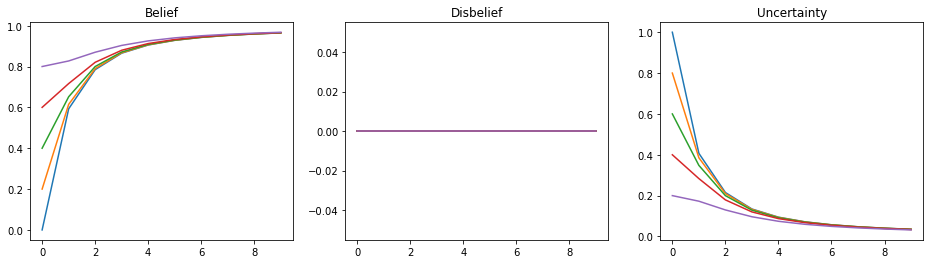

In [244]:
N = 5
INTERACTIONS = 10
state = uniform_without_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.5)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

In [122]:
states[-1]

[Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5])]

### Averaging fusion

If agents completely trust each other, belief converges to average.

Otherwise, belief will converge to 0. Increasing trust, decreases the convergence speed.

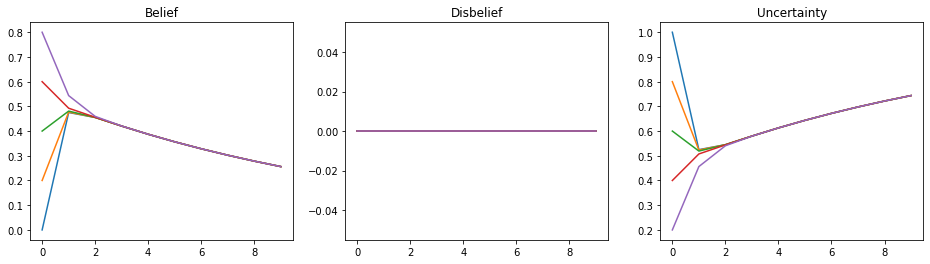

In [225]:
N = 5
INTERACTIONS = 10
state = uniform_without_dogmatic(N)
states = [state]
trust_graph = clique(N, 0.9)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

In [120]:
states[-1]

[Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5]),
 Hyperopinion(2, [0.5620438 0.       ], [0.5 0.5])]

## Example 2: Uniform with fixed uncertanty (0.1)

### Cumulative fusion

Converges to average as fast as trust increases.

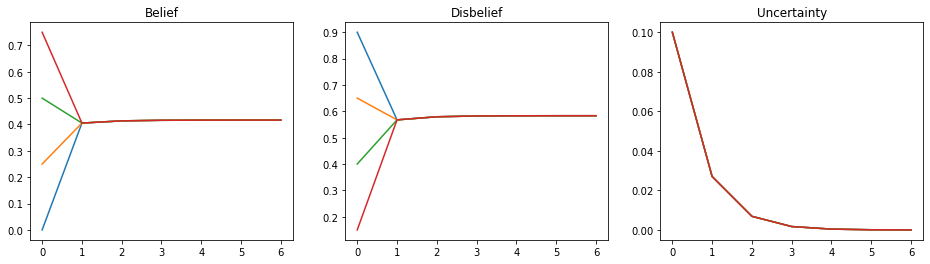

In [268]:
N = 4
INTERACTIONS = 7
state = uniform_u_fixed(N, 0.1)
states = [state]
trust_graph = clique(N, 1)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))

plot(N, INTERACTIONS, states)

In [243]:
states[-1]

[Hyperopinion(2, [0.40908638 0.58467145], [0.5 0.5]),
 Hyperopinion(2, [0.41240597 0.58135186], [0.5 0.5]),
 Hyperopinion(2, [0.41572556 0.57803227], [0.5 0.5]),
 Hyperopinion(2, [0.41904514 0.57471269], [0.5 0.5])]

### Averaging fusion

Why?

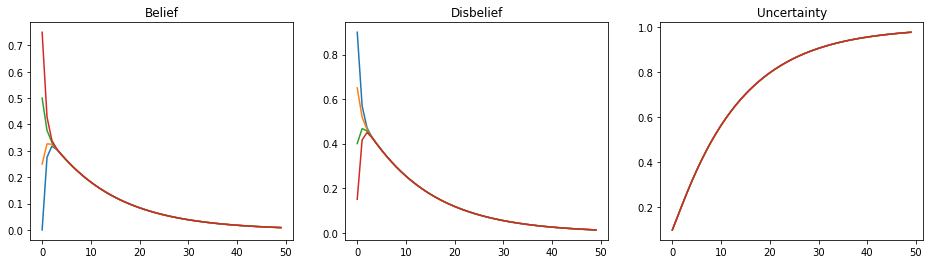

In [277]:
N = 4
INTERACTIONS = 50
state = uniform_u_fixed(N, 0.1)
states = [state]
trust_graph = clique(N, 0.9)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, states[-1]))

plot(N, INTERACTIONS, states)

In [129]:
states[-1]

[Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5]),
 Hyperopinion(2, [0.5 0.4], [0.5 0.5])]

## Example 3: Consensus state

### Cumulative fusion

As the number of agents increases, it converges faster. It converges, because uncertainty decreases.

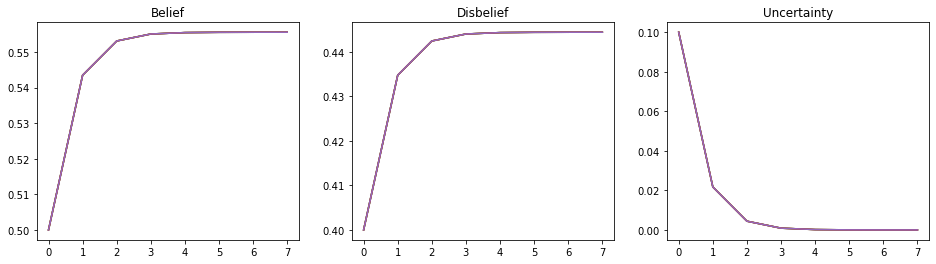

In [212]:
N = 5
INTERACTIONS = 8
state = consensus_state(N, [0.5, 0.4])
states = [state]
trust_graph = clique(N, 1)

for i in range(INTERACTIONS):
    states.append(overall_update(cumulative_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)

### Averaging fusion

As expected.

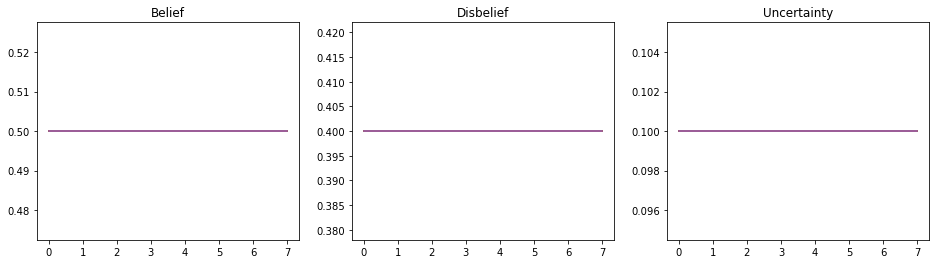

In [250]:
N = 5
INTERACTIONS = 8
state = consensus_state(N, [0.5, 0.4])
states = [state]
trust_graph = clique(N, 1)

for i in range(INTERACTIONS):
    states.append(overall_update(averaging_fusion, trust_graph, states[-1]))
    
plot(N, INTERACTIONS, states)